# Midterm - DS2000B and IS2002B

## Student ID: 251227666 (XX / 100)

## General comments

This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the first six Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to documents that are shared - i.e. on google docs or dropbox - or communicate in any other way with anyone (real or AI-agent such as chatGPT) inside or outside the class during the midterm.** To finish the midterm in the alloted 1hr and 50min, you will have to work efficiently. **Read the entirety of each question carefully.** 

You need to submit the midterm by the due date (12:20) on OWL under Assignments/Midterm. Late submission will be scored with 0 pts, unless you have received extra accommadation. So please start your submission five minutes before the deadline!  

### Additional Guidance

The midterm is supposed to be challenging. If you get stuck on a particular question because you can't solve a programming problem, just write down in text *how* you would try to solve the problem - if correct this can give you partial points. Then continue the other parts of the question, the next question, or next task. The midterm is designed, such that the solutions do not require that the previous question is solved correctly. 
If you need the solution from a previous problem, just *assume* some outcome and answer the question under that assumption. If you do this, make your assumptions explicit. 

Read all the questions carefully. Each questions demands a written answer as part of it. These need to be spelled out in a whole English sentence. 

In [1]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, and seaborn. 

### You are not allowed to rely on any other packages or modules.  

import matplotlib
import matplotlib.pyplot as plt 

import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as ss

## Data set
Transcranial direct current stimulation (tDCS) is a form of electrical brain stimulation. It send a weak electric current through the brain. tDCS is thought to increase brain plasticity if it is applied during behavioral training  

In 2012, our lab conducted a study looking at the causal effect of tDCS during motor sequence learning. Participant where a ad-hoc sample from the undergraduate population at UCL (University College London). Participants had to type out sequences of 5 numbers as fast as possible on a keyboard. First, they were tested before training (pre-test). We recorded both average movement time (MT), i.e. how many seconds they required to complete the 5 key presses, and the proportion of trials with an error (Error). To reduce the differences in preexisting performance, we decided to admit only participants that could do the task at pretest reasonably well (Movement time < 3.6s) to the main study. This led to the exclusion of 15 participants (not in the dataset).

Half of these participants were randomly assigned to a experimental group, and the other half to the control group. We decided to block for gender in this experiment, but no other variable. All participants trained the task for 4 consecutive days for 60min each with the left hand. During training, we attached two electrodes to their head. For the experimental group a current was sent between electrodes. The control group received only a brief stimulation, so they also experienced the initial tingle on the scalp, but after that the current was switched off. When interviewed afterwards, participants were not better at chance at guessing whether they were assigned to the tDCS or Control group.  

The Data frame contains the following variables. 

1. SN - Subject Number 
2. age - Age of the Subject at time of testing in years 
3. gender - Gender of subject: 'F':female or 'M':male 
4. hand - performing hand 1=left 2=right (you have only left hand data here)
5. tDCS - 1 = Experimental group, 0 = control group  
5. Error_pre: Proportion of error trials at pre-test 
6. Error_post: Proportion of error trials at post-test
7. MT_pre: average Movement time at pre-test  
8. MT_post: average Movement time at post-test

**REFERENCE**: 
Waters-Metenier, S., Husain, M., Wiestler, T., & Diedrichsen, J. (2014) Bihemispheric tDCS enhances effector-independent representations of motor synergy and sequence learning. Journal of Neuroscience.

All details required to answer this midterm are given in this Jupyter notebook - no information from the (more complex) original study is required. 


**WARNING**: While this is a real result and has been replicated a number of times, other studies have found smaller or no effect of tDCS on motor learning. Therefore the overall efficacy of this treatment is still a matter of debate. Also, tDCS is only safe when applied with medically approved equipment and by trained personnel - so please do not try this at home.    

## Task 1: Descriptors  

### Question 1.1 (5 pts)
Load the data file `tDCS_study_data.csv`. Find the participant with the slowest movement time at pre-test (MT_pre) and print out the corresponding row of the data frame),

*Written answer*: report their MT_pre, their age, and gender (in a full English sentence)

In [2]:
df = pd.read_csv("tDCS_study_data.csv")
slowest = df.iloc[7]
slowest

SN                 10
age                23
gender              M
hand                1
tDCS                1
Error_pre     0.03125
Error_post    0.09375
MT_pre          3.582
MT_post       0.86422
Name: 7, dtype: object

The slowest participant has a pre-time of 3.582, they are a 23 y/o male.

### Question 1.2 (7 pts)
Print a table that shows the number of males and females participants assigned to the Experimental (tDCS) and Control group respectively. (3pts)

*Written answer*: What is the cause of this particular distribution of males / females across the two groups? (4pts)

*Hint*: see description of dataset for possible clues

In [3]:
table = pd.crosstab(df['gender'], df['tDCS'], margins = True)
table

tDCS,0,1,All
gender,,,
F,6,6,12
M,6,6,12
All,12,12,24


The particular distribution is a result of blocking which was controlled for in the experimental set up. Treatment (1) and control (0) were then assigned randomly. 

### Question 1.3 (7pts)
Plot a histogram of the pretest-MT using 9 bins

*Written answer*: How would describe the shape of the distribution? What may be the reason for this particular shape of the distribution?

*Hint*: see description of dataset for possible clues



Text(0, 0.5, 'Count')

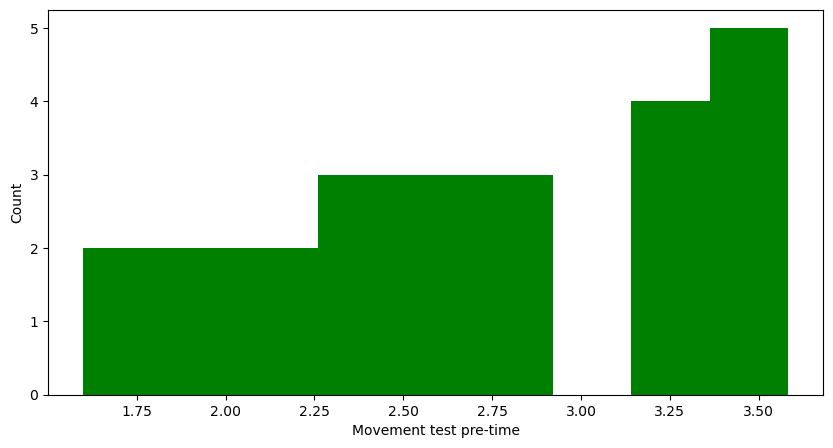

In [4]:
fig, axes = plt.subplots(figsize = (10,5))

axes.hist(df['MT_pre'], bins = 9, color = 'g')
axes.set_xlabel("Movement test pre-time")
axes.set_ylabel("Count")

Figure 1. Histogram of movement time pre test. Time is recorded in seconds. 

The shape of the distribution is Left skewed. This could be because participants were experiencing the learning curve of the activity, resulting in larger movement times. 

### Question 1.4 (9pts)

Generate a boxplot of the pre-MT, with separate boxes for the experimental and control group. (2pts)

*Written answer*: Which group performed faster at pre-test? (2pts)

*Written answer*: Assume that the authors then used a randomization test to test for the effect of tDCS onto the post-test test performance. They found a significant group difference with p=0.01. 
Given the observed differences at pre-test, do you think you can still meaningfully interpret this p-value? That is, can the authors still reject the Null-hypothesis that tDCS has no influence on post-test performance? (5pts)

Text(0.5, 0, 'Condition (Control/Experimental)')

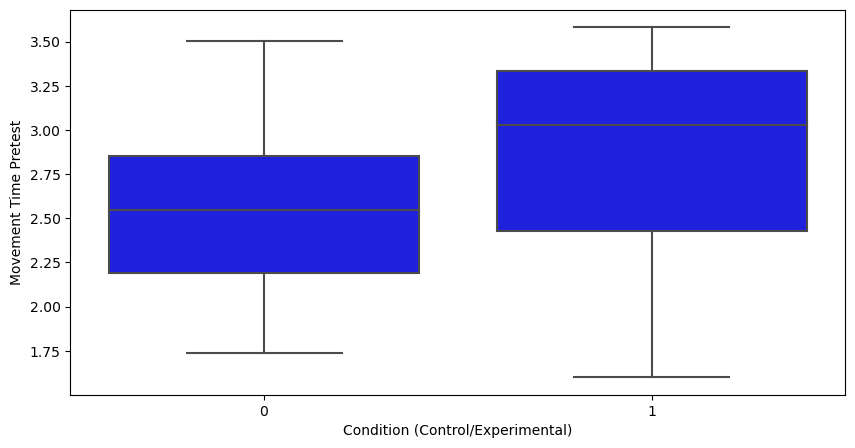

In [5]:
fig, axes = plt.subplots(figsize = (10,5))
sns.boxplot(data = df, y = "MT_pre", x = "tDCS", ax = axes, color = "b")
axes.set_ylabel("Movement Time Pretest")
axes.set_xlabel("Condition (Control/Experimental)")

Figure 2. Box plot of movement time pretest (in seconds) vs the control (0) and experimental groups (1)

The control group performed faster during the pre test. I think the p-value becomes less meaningfull as the differnece in initial test results were so vast. I think a larger sample size would help to even out the averages in pre-time between groups, this would also allow for a better representation of the greater population. With all this being said, the fact that the p value is very low does speak to the possible rejection, as both groups improved but with the experimental being so much higher initially and so much lower after, that should also be noted. Therefore, I would conclude that the null hypothesis can be rejected, but further testing should be done to verify it for the greater population. 

### Question 1.5 (6pts)

Generate a boxplot of the MT_post, with separate boxes for the experimental and control group. (2pts)

**Written answer**: Was the 25th percentile of MT_post for the control group smaller or larger than 75th percentile of MT_post for the experimental group? (4pts)

Text(0.5, 0, 'Condition (Control/Experimental)')

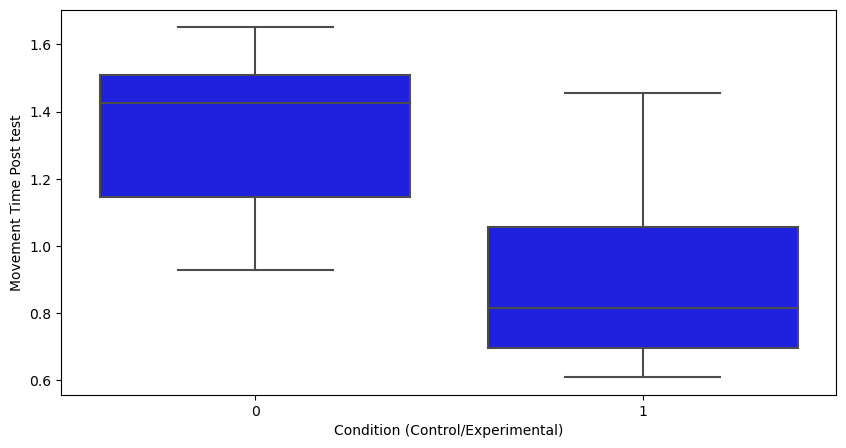

In [6]:
fig, axes = plt.subplots(figsize = (10,5))
sns.boxplot(data = df, y = "MT_post", x = "tDCS", ax = axes, color = "b")
axes.set_ylabel("Movement Time Post test")
axes.set_xlabel("Condition (Control/Experimental)")

Figure 3. Box plot of movement time post test (in seconds) vs the control (0) and experimental groups (1)

The 25th percentile of the control group is larger that the 75th percentile of the experimental group. From the graph it appears to be control = 1.15 and experimental = 1.08 or values close to. 

## Task 2: Randomization test and experimental inference
### Question 2.1 (8pts)
The authors want to test the hypothesis that the application of tDCS leads to a larger *change* from the pretest MT to post-test MT, as compared to a group that receives no tDCS. 
The authors want to generalize the results to the group that the sample was drawn from (young healthy college students), independent of their exact age and their pre-test performance.  

*Written answer*: Formulate the appropriate Null-hypothesis test. (3pts) 

Under this Null-hypothesis hypothesis, which variable is *exchangeable*? That is, which column in the data frame should you shuffle to build up a distribution under the Null hypothesis: 

 * Age 
 * MT_pre
 * MT_post
 * tDCS?

Justify why your chosen answer is correct, and why all other answers are incorrect. (5pts)



H0: tDCS has not effect on the change from pretestMT to posttest MT. The difference in MT (pre-post) is the same or smaller in the experimental as compared to the control group. (3pts)

Under the Null-hypothesis, tDCS (Experimental vs. Control) is exchangeable (because this was randomly assigned) and should be shuffled. Note that all other variables are not exchangeable as they were not randomly assigned.  (2pts for the right pick, 3pts for correct justification.)

I'm pretty sure the answers for this question were given above.  

### Question 2.2 (12pts)
Perform a randomization test to test the hypothesis that the application of tDCS causes the post-test MT to be *lower* in the Experimental as compared to the control group.
First, write a function that returns the mean difference in MT_post between the experimental and control group as your test statistics. 
Then use this function in a randomization test with at least 10000 iterations to build the expected  distribution of this statistics under the Null-hypothesis. 

*Written answer*: Report the observed mean difference, and the p-value for the case that you decided to reject the Null-hypothesis for the observed (or a more extreme) mean difference. Choose carefully between a one-sided and two-sided test. What is the correct interpretation of the p-value?    

*Note*: If you are using functions from a previous homework assignment, include all the necessary code in your answer. 

In [7]:
def meanDiff(D):

    postTimeC = D["MT_post"].groupby(D['tDCS']).get_group(0).mean()

    postTimeE = D["MT_post"].groupby(D['tDCS']).get_group(1).mean()

    diff = postTimeC - postTimeE
    
    return diff


def permutation_test(frame, fnc, shuffle, numIter = 500, sides = 1, pBin = 25):
    sample = np.array([])
    
    for i in range(0, numIter):
        df_copy = frame.copy()
        idx = df_copy.index
        idx_arr = np.arange(0, len(idx))
        np.random.shuffle(idx_arr)
        shuffled_gender = df_copy[shuffle].iloc[idx_arr]
        shuffled_gender_id = shuffled_gender.reset_index(drop = True)
        df_copy[shuffle] = shuffled_gender_id
        sample = np.append(sample, fnc(df_copy))
        
    # Graph     
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10))
    axes.hist(sample, bins = pBin, color = 'b')
    plt.axvline(x = fnc(frame), color = 'r')
    axes.set_ylabel("Number of Observations")
    axes.set_xlabel(f"Result of test")
    
    # P-Value
    if sides == 2:
        plt.axvline(x = -(fnc(frame)), color = 'r')
        a = np.absolute(sample) >= fnc(frame)
        twosided = sum(a) / len(sample)
    
        print(f"The result of the two sided test is {twosided}")
        
    else:
        a = sample >= fnc(frame)
        p = sum(a) / len(sample)
        print(f"The p-value is {p}")
    
    return sample


The p-value is 0.0001
The observed mean difference is 0.46471833333333323


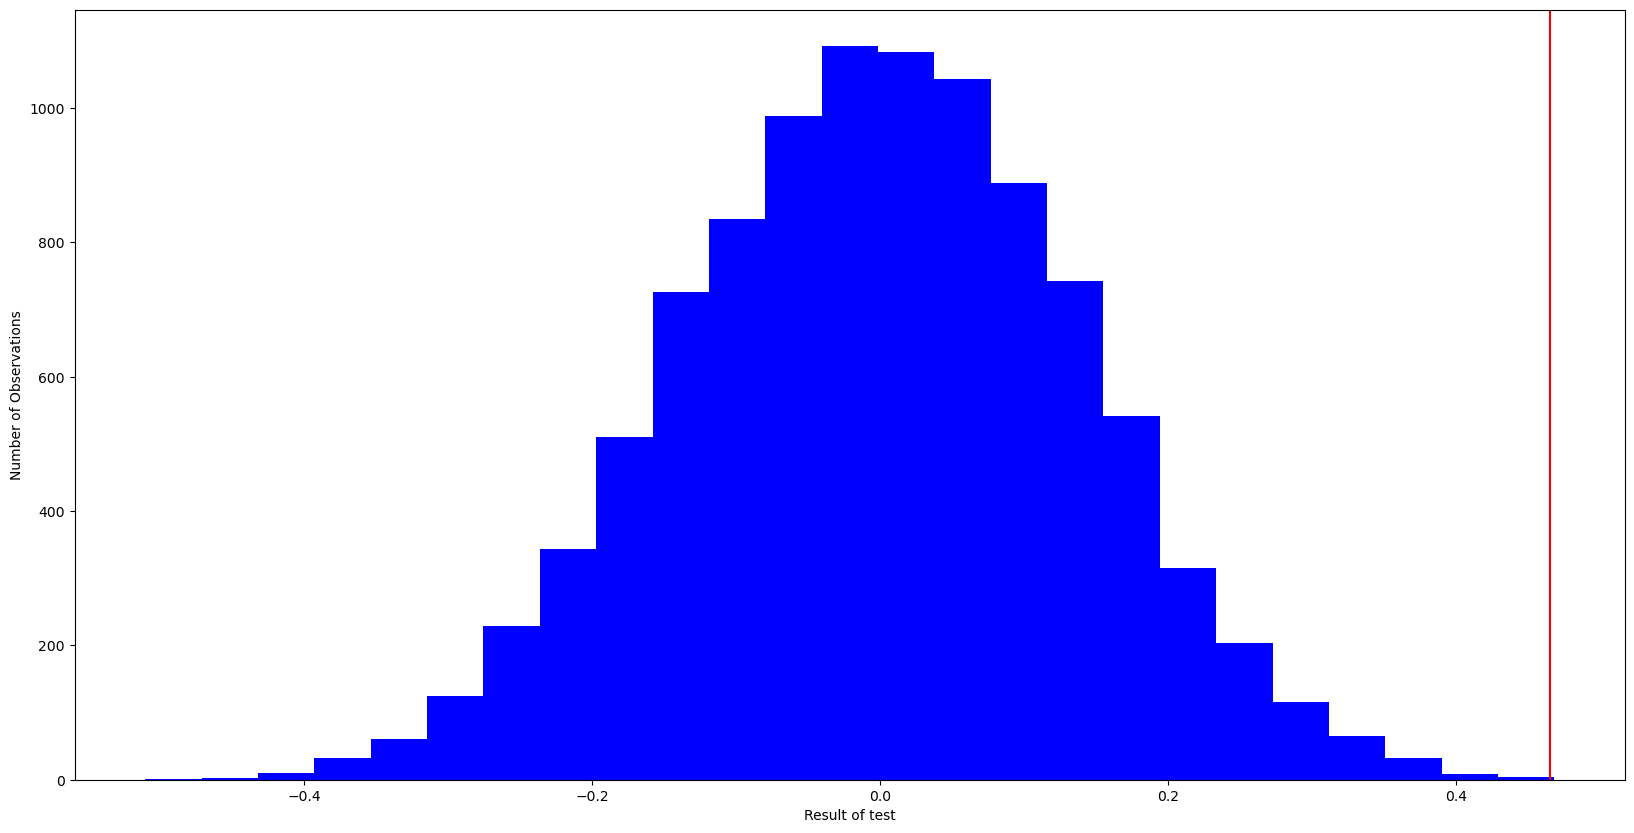

In [8]:
store = permutation_test(df, fnc = meanDiff, shuffle = "tDCS", numIter = 10000, sides = 1, pBin = 25)
print("The observed mean difference is", meanDiff(df))

Figure 4. Histogram of distributions after the result of the mean difference test between experimental and control groups and thir post-test time. The red line is the test statistic at a value of 0.4647. 

Due to the p-value being less than 0.05 (my value was 0.0003), the null hypothesis that tDCS has no effect on the change from pretestMT to posttest MT is rejected. The mean difference statistic was a reported value of 0.4647.

### Question 2.3 (10pts)
Now let's test the Hypothesis that the application of tDCS influences (increases or decreases) the proportion of errors that people make in the post-test. 

*Written answer*: Formulate the corresponding Null-hypothesis. (2pts)

Then write a function to return the difference in the proportion of errors between the two groups. (1pts)

*Written answer*: What Difference in error rate do you observe between the groups? Which group made more errors? (1pts)

Conduct conduct the appropriate randomization test to determine a p-value, if you had rejected the Null-hypothesis for the observed difference. (4pts)

*Written answer*: What is your conclusion about the above Hypothesis? (2pts)

H0: tDCS has no effect on the proportion of errors that people make post test.  
HA: tDCS has an effect on the proportion of errors that people make post test.

In [9]:
# Ok so because it says application of tDCS I have to assume that it is talking about the experimental group
# because that is the group that had an effect applied. 

def meanDiff2(D): # Error_pre
    preErr = D["Error_pre"].groupby(D['tDCS']).get_group(1).mean()

    postErr = D["Error_post"].groupby(D['tDCS']).get_group(1).mean()

    diff = preErr - postErr
    
    return diff

meanDiff2(df)

0.02083333333333333

The difference in proportions of error rate is very small at 0.02083. The group that made more errors was the pretest group.

The result of the two sided test is 0.665


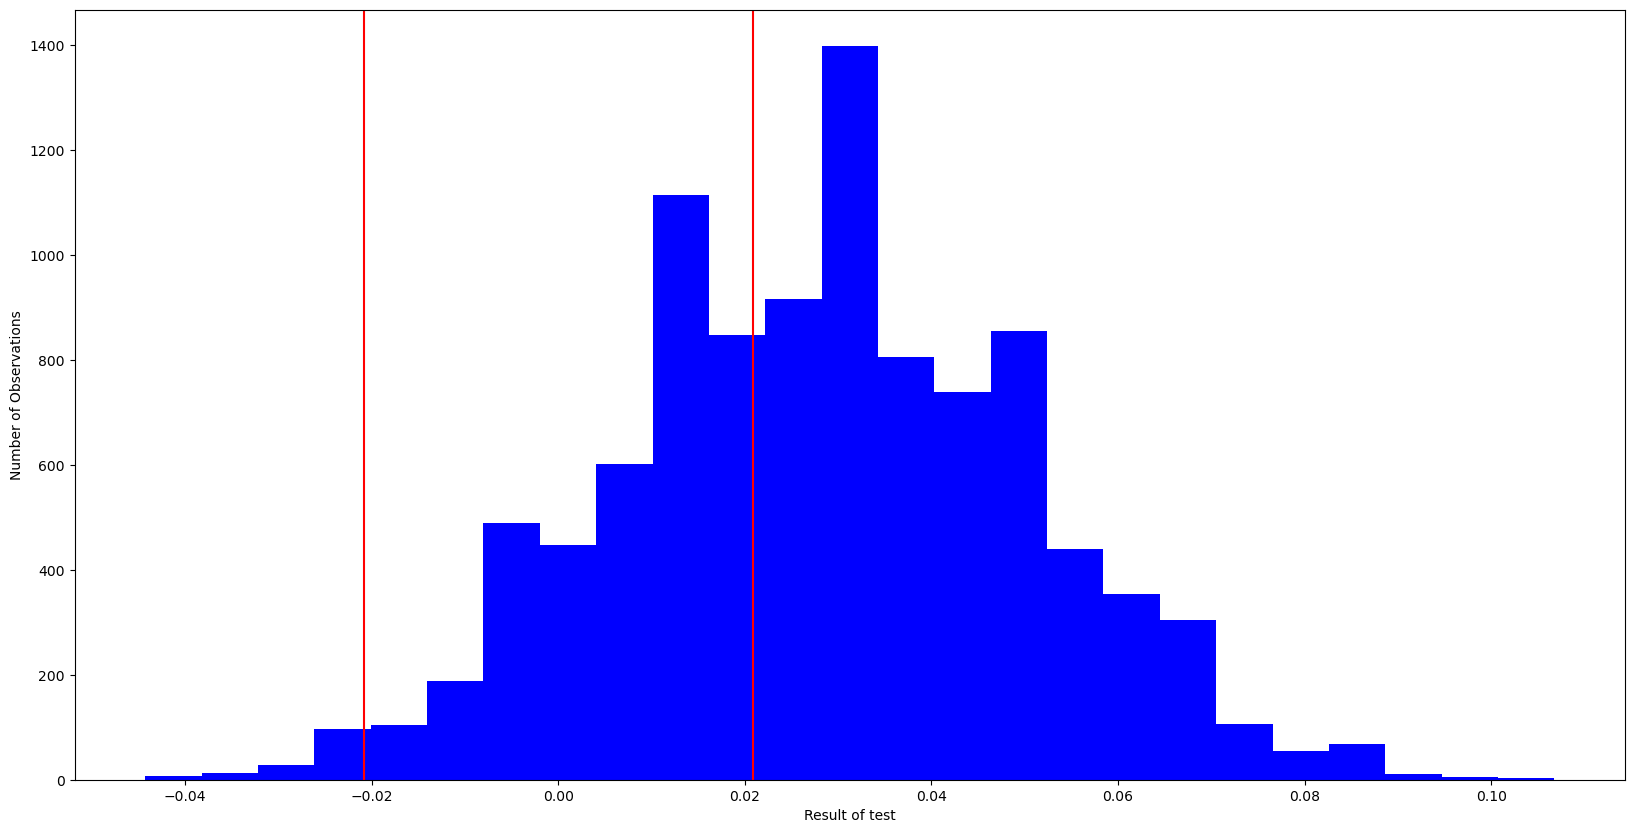

In [10]:
store = permutation_test(df, fnc = meanDiff2, shuffle = "tDCS", numIter = 10000, sides = 2, pBin = 25)

Figure 5. Histogram of distributions after the result of the mean difference test between error proportions pre and post test. The red line is the test statistic at a value of +-0.02083, as a two-tailed test was applied.

Due to the high p-value (p = 0.6717  > 0.5), the null hypothesis that there is no difference between pre and post times cannot be rejected.

### Question 2.4 (13pts)
Based on this result, the reviewers of the paper asked for a Bayesian test to determine how strong the evidence for the Null-hypothesis (that tDCS does not cause a difference in Error rate in the Post-test). 

The Null-hypothesis (H0) is that the average error rate difference is normally distributed with mean zero and standard deviation 0.02. 

The alternative hypothesis (H1) is undirected: 
With p=0.5, the error rate difference is normally distributed with mean 0.03 and standard deviation of 0.02
With p=0.5, the error rate difference is normally distributed with mean -0.03 and standard deviation of 0.02. 

What is the Bayes Factor for H0 vs. H1? Is the evidence in favor of the the H0 or H1? How strong is that evidence (according to Kaas & Rafetery's convention)? 

*Hint:* If you have problems solving this for the undirected hypothesis, simply solve it for the directed hypothesis that states that the error rate difference is normally distributed with mean -0.03 (Higher error rate for Experimental than control group) and standard deviation of 0.02. You will loose 5 points, but at least you can show that you can do a Bayesian test (total worth 8pts).   

In [11]:
p0 = ss.norm.pdf(meanDiff2(df), 0, 0.02)

p1 = ss.norm.pdf(meanDiff2(df), 0.5, 0.02)

# effect = 0.5?

# Calculate BF10
BF10 = p1/p0
print(BF10)

3.9149528694764155e-125


Do to the very low bayes factor the evidence is negative, in favour of the other hypothesis. Which means the null hypothesis that there is no differnece is more likely correct.

## Task 3: Bootstrap 
### Question 3.1  (13 pts)
Clearly people differ quite a bit in their ability to produce finger sequences even before training (and before getting tDCS). 
To get a better estimate of the mean performance (the population parameter), we only have the sample of 24 participants.  

Report the best estimate of the average pre-test MT in the population. (3pts) Use a bootstrap analysis (using a percentile method) to estimate a 95% confidence interval around this estimate. (4pts)

*Written answer*: What is the correct interpretation of this confidence interval? What is the population for which this confidence interval is valid?   (6 pts)

In [12]:
def confidenceInt(data, prec):
    bounds = []
    bounds.append(np.percentile(data, 100-prec))
    bounds.append(np.percentile(data, prec))
    
    return bounds

# Input arguments 
# - data: data series to resample
# - N: Sample size for each iteration 
# - fcn: function to apply to the sample to get the statistics
# - numIter: Number of resamples (should default to 1000) 

# Output argument: 
# - Numpy array of size numIter that contains the estimates of the statistics (i.e. the bootstrap sample)

def bootstrap(data, N, fcn, numIter = 1000):
    sample = np.array([])
    
    for i in range (0, numIter):
        value = np.random.choice(data, replace = True, size = N)
       
        x = fcn(value)
        
        
        sample = np.append(sample, x)
    
    
        
    return sample


In [13]:
print("The best estimate of the average pre-test time is", df["MT_pre"].mean())

s = bootstrap(df["MT_pre"], 24, np.mean, numIter = 10000)
print("With a 95% confidence interval of", confidenceInt(s, 95))


The best estimate of the average pre-test time is 2.716799999999999
With a 95% confidence interval of [2.515323125, 2.91962375]


This means that 95% of the time the average pre-test time will be found within this interval. Due to the small sample size the generalizabilty of this stat is low and therefore only applies to the population of the sample itself.

### Question 3.2 (10 pts)
Now the population parameter we are interested in is the minimal time that the best UCL undergrad student (without specific training) can perform at the pre-test. 

First report the minimal value in the sample. (1pts) 

Then use a bootstrap analysis to plot a bootstrap sample distribution for the minimal value. (2pts)  

*Written answer*: Describe the shape of this distribution (2 pts)

Finally use the  percentile method (as in question 3.1) to obtain a 95% confidence interval for the population parameter. (2 pts)

*Written answer*: Give a reasons why this Confidence interval that you constructed is most likely incorrect. (3pts)

In [14]:
# minimal value in pretest time (MT_pre) for someone wthout training -- it's pre no one has training??
print("The minimal value is", df['MT_pre'].min())

The minimal value is 1.6


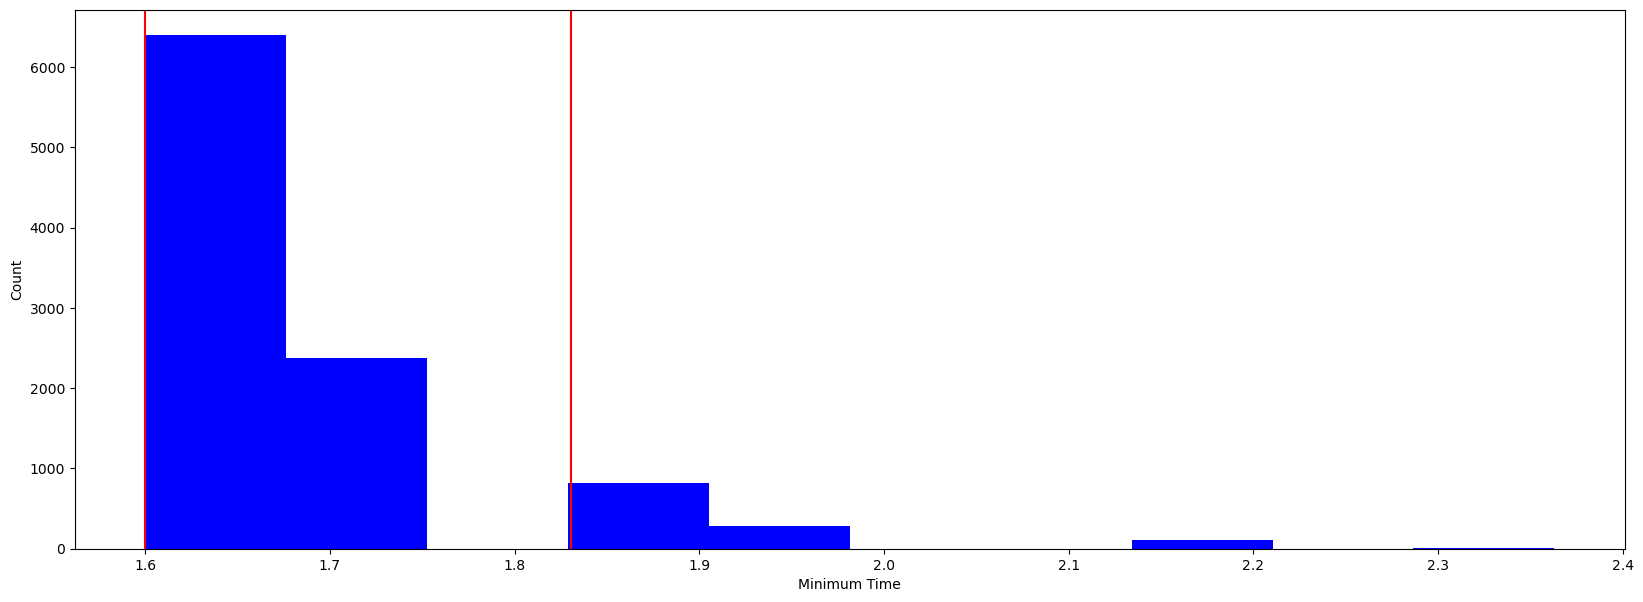

In [15]:
m = bootstrap(df['MT_pre'], 24, np.min, numIter = 10000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,7))
axes.hist(m, bins = 10, color = 'b')
axes.set_xlabel("Minimum Time")
axes.set_ylabel("Count")
plt.axvline(x = confidenceInt(m, 95)[0], color = 'r')
plt.axvline(x = confidenceInt(m, 95)[1], color = 'r')

Figure 6. Histogram of distribution of miminum value obtained in bootstrap sample of movement test pre-time. Red lines are at the 95% confidence interval.

The shape of this distribution is right skewed. 

In [16]:
print("The confidence interval is", confidenceInt(m, 95))

The confidence interval is [1.6, 1.8306]


The confidence interval is most likely incorrect as the sample size is so small. Although this sums up the sample population very well it is unlikely that it would apply in the real world.